# CNN MİMARİLERİ

In [1]:
*

fuck you bich


###Veri Seti CİFAR-10
**İçeriği:** Toplam 60.000 adet renkli (RGB) görüntü içerir.

**Her görüntü:** 32x32 piksel boyutundadır.

**Her görüntüde:** 3 renk kanalı (Red, Green, Blue) bulunur.

**Etiketler:** Görüntüler, 10 farklı sınıfa aittir. Her sınıf için 6.000 görüntü vardır.

📁 Veri Yapısı
1.   Eğitim verisi (Training set): 50.000 görüntü
2.   Test verisi (Test set): 10.000 görüntü


🏷️ Sınıflar (10 kategori)

    Uçak,Otomobil,Kuş,Kedi,Geyik,Köpek,Kurbağa,At,Gemi,Kamyon





In [ ]:
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10
import numpy as np
from tensorflow.keras import layers, models
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.utils import to_categorical
from tabulate import tabulate

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 15s 0us/step


<ipython-input-2-270556315570>:15: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  plt.xlabel(class_names[int(y_train[i])])


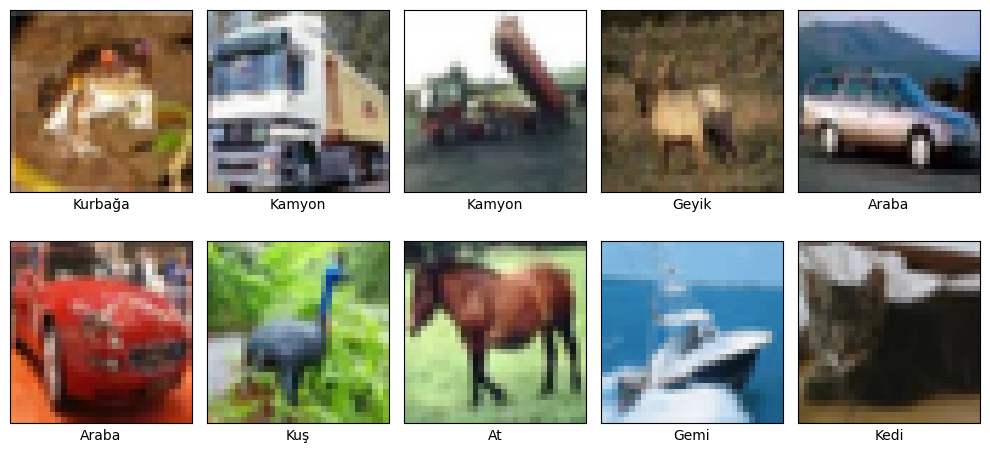

In [ ]:

# CIFAR-10 veri setini yükle
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Etiket isimlerini tanımla
class_names = ['Uçak', 'Araba', 'Kuş', 'Kedi', 'Geyik', 'Köpek', 'Kurbağa', 'At', 'Gemi', 'Kamyon']

# İlk 10 resmi ve etiketlerini göster
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i])
    plt.xlabel(class_names[int(y_train[i])])
plt.tight_layout()
plt.show()


### Basit Cnn Mimarisi

In [ ]:
def build_simple_cnn():
    model = models.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.Flatten(),
        layers.Dense(64, activation='relu'),
        layers.Dense(10, activation='softmax')
    ])
    return model

### Vgg-16

In [ ]:
def build_vgg16():
    model1 = models.Sequential([
        # Block 1
        layers.Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)),
        layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
        layers.MaxPooling2D((2, 2), strides=2),

        # Block 2
        layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
        layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
        layers.MaxPooling2D((2, 2), strides=2),

        # Block 3-5 (Orijinal VGG'den daha az filtre)
        layers.Conv2D(256, (3, 3), activation='relu', padding='same'),
        layers.Conv2D(256, (3, 3), activation='relu', padding='same'),
        layers.MaxPooling2D((2, 2), strides=2),

        layers.Flatten(),
        layers.Dense(512, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(512, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(10, activation='softmax')
    ])
    return model1

### Resnet-50

In [ ]:
def build_resnet50():
    base_model = ResNet50(weights=None, include_top=False, input_shape=(32, 32, 3))
    x = layers.GlobalAveragePooling2D()(base_model.output)
    x = layers.Dense(256, activation='relu')(x)
    outputs = layers.Dense(10, activation='softmax')(x)
    model2 = models.Model(inputs=base_model.input, outputs=outputs)
    return model2

### Mini Nin

In [ ]:
def build_mini_nin():
    model3 = models.Sequential([
        layers.Conv2D(192, (5, 5), activation='relu', padding='same', input_shape=(32, 32, 3)),
        layers.Conv2D(160, (1, 1), activation='relu'),
        layers.Conv2D(96, (1, 1), activation='relu'),
        layers.MaxPooling2D((3, 3), strides=2),
        layers.Dropout(0.5),

        layers.Conv2D(192, (5, 5), activation='relu', padding='same'),
        layers.Conv2D(192, (1, 1), activation='relu'),
        layers.Conv2D(192, (1, 1), activation='relu'),
        layers.MaxPooling2D((3, 3), strides=2),
        layers.Dropout(0.5),

        layers.Conv2D(192, (3, 3), activation='relu', padding='same'),
        layers.Conv2D(192, (1, 1), activation='relu'),
        layers.Conv2D(10, (1, 1), activation='relu'),
        layers.GlobalAveragePooling2D(),
        layers.Activation('softmax')
    ])
    return model3

# Modellerin Çalıştırılması

## Basit Cnn Örneği

In [ ]:
# Veri setini yükle
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Model seçimi
model = build_simple_cnn()  # Diğer modellerden birini seçebilirsiniz
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Eğitim
history = model.fit(x_train, y_train,
                    batch_size=128,
                    epochs=15,
                    validation_data=(x_test, y_test))

Epoch 1/15
391/391 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - accuracy: 0.3196 - loss: 1.8554 - val_accuracy: 0.5060 - val_loss: 1.4158
Epoch 2/15
391/391 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.5339 - loss: 1.3049 - val_accuracy: 0.5587 - val_loss: 1.2196
Epoch 3/15
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.5915 - loss: 1.1525 - val_accuracy: 0.6207 - val_loss: 1.0782
Epoch 4/15
391/391 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.6368 - loss: 1.0363 - val_accuracy: 0.6389 - val_loss: 1.0221
Epoch 5/15
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.6671 - loss: 0.9572 - val_accuracy: 0.6519 - val_loss: 1.0024
Epoch 6/15
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.6892 - loss: 0.8886 - val_accuracy: 0.6737 - val_loss: 0.9436
Epoch 7/15
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.7055 - loss: 0.8476 - val_accuracy: 0.6807 - val_loss: 0.9131
Epoch 8/15
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.7217 - loss: 0.8006 - val_accuracy: 0

In [ ]:
# Değerlendirme
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_acc*100:.2f}%")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7164 - loss: 0.8669
Test Accuracy: 71.40%


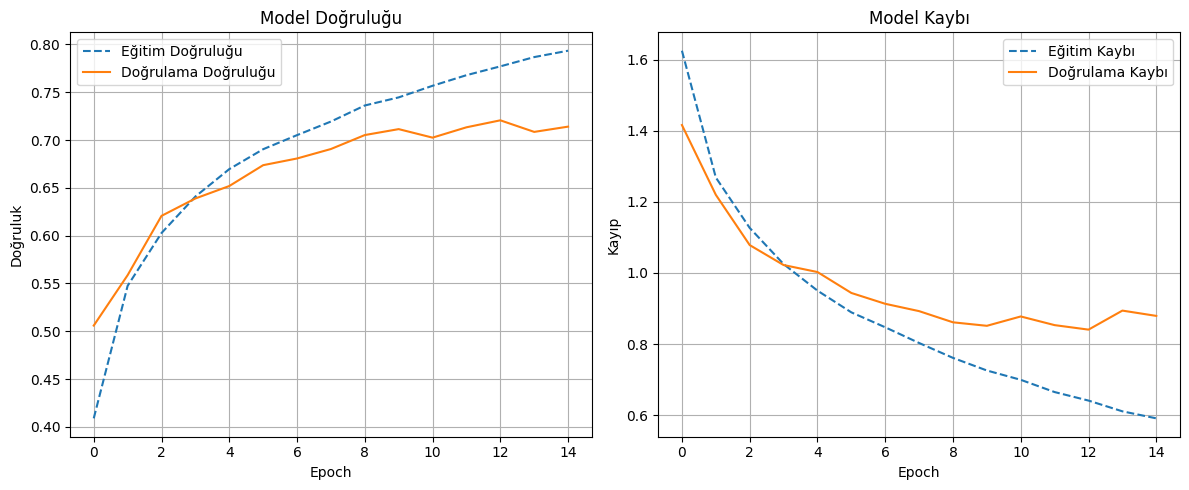

In [ ]:

# Doğruluk (Accuracy) grafiği
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Eğitim Doğruluğu', linestyle='--')
plt.plot(history.history['val_accuracy'], label='Doğrulama Doğruluğu', linestyle='-')
plt.title('Model Doğruluğu')
plt.xlabel('Epoch')
plt.ylabel('Doğruluk')
plt.legend()
plt.grid(True)

# Kayıp (Loss) grafiği
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Eğitim Kaybı', linestyle='--')
plt.plot(history.history['val_loss'], label='Doğrulama Kaybı', linestyle='-')
plt.title('Model Kaybı')
plt.xlabel('Epoch')
plt.ylabel('Kayıp')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


In [ ]:
# Basit CNN sonuçları
table_cnn = [
    ["Model", "Eğitim Accuracy", "Test Accuracy", "Eğitim Loss", "Test Loss"],
    ["Basit CNN",
     f"{history.history['accuracy'][-1]:.4f}",
     f"{history.history['val_accuracy'][-1]:.4f}",
     f"{history.history['loss'][-1]:.4f}",
     f"{history.history['val_loss'][-1]:.4f}"]
]

cnn_table_str = tabulate(table_cnn, headers="firstrow", tablefmt="grid")


In [ ]:
print(cnn_table_str)

+-----------+-------------------+-----------------+---------------+-------------+
| Model     |   Eğitim Accuracy |   Test Accuracy |   Eğitim Loss |   Test Loss |
+===========+===================+=================+===============+=============+
| Basit CNN |            0.7934 |           0.714 |         0.591 |      0.8791 |
+-----------+-------------------+-----------------+---------------+-------------+


## Vgg-16 Örneği

In [ ]:
# Veri setini yükle
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Model seçimi
model1 = build_vgg16()  # Diğer modellerden birini seçebilirsiniz
model1.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Eğitim
history1 = model1.fit(x_train, y_train,
                    batch_size=128,
                    epochs=15,
                    validation_data=(x_test, y_test))



Epoch 1/15
391/391 ━━━━━━━━━━━━━━━━━━━━ 20s 39ms/step - accuracy: 0.2222 - loss: 2.0511 - val_accuracy: 0.5035 - val_loss: 1.3421
Epoch 2/15
391/391 ━━━━━━━━━━━━━━━━━━━━ 14s 29ms/step - accuracy: 0.5287 - loss: 1.2958 - val_accuracy: 0.6161 - val_loss: 1.0802
Epoch 3/15
391/391 ━━━━━━━━━━━━━━━━━━━━ 11s 28ms/step - accuracy: 0.6520 - loss: 0.9877 - val_accuracy: 0.7038 - val_loss: 0.8518
Epoch 4/15
391/391 ━━━━━━━━━━━━━━━━━━━━ 21s 30ms/step - accuracy: 0.7175 - loss: 0.8141 - val_accuracy: 0.7335 - val_loss: 0.7679
Epoch 5/15
391/391 ━━━━━━━━━━━━━━━━━━━━ 12s 30ms/step - accuracy: 0.7682 - loss: 0.6712 - val_accuracy: 0.7499 - val_loss: 0.7384
Epoch 6/15
391/391 ━━━━━━━━━━━━━━━━━━━━ 12s 30ms/step - accuracy: 0.8008 - loss: 0.5758 - val_accuracy: 0.7650 - val_loss: 0.7058
Epoch 7/15
391/391 ━━━━━━━━━━━━━━━━━━━━ 20s 28ms/step - accuracy: 0.8316 - loss: 0.4935 - val_accuracy: 0.7799 - val_loss: 0.6748
Epoch 8/15
391/391 ━━━━━━━━━━━━━━━━━━━━ 21s 30ms/step - accuracy: 0.8585 - loss: 0.4105 - 

In [ ]:
# Değerlendirme
test_loss, test_acc = model1.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_acc*100:.2f}%")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7884 - loss: 0.8376
Test Accuracy: 78.77%


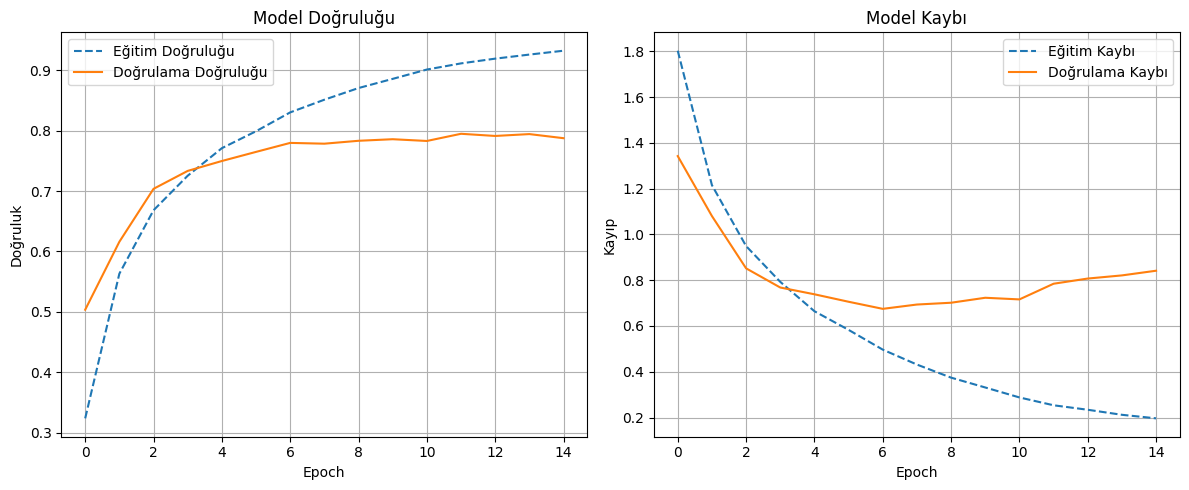

In [ ]:

# Doğruluk (Accuracy) grafiği
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history1.history['accuracy'], label='Eğitim Doğruluğu', linestyle='--')
plt.plot(history1.history['val_accuracy'], label='Doğrulama Doğruluğu', linestyle='-')
plt.title('Model Doğruluğu')
plt.xlabel('Epoch')
plt.ylabel('Doğruluk')
plt.legend()
plt.grid(True)

# Kayıp (Loss) grafiği
plt.subplot(1, 2, 2)
plt.plot(history1.history['loss'], label='Eğitim Kaybı', linestyle='--')
plt.plot(history1.history['val_loss'], label='Doğrulama Kaybı', linestyle='-')
plt.title('Model Kaybı')
plt.xlabel('Epoch')
plt.ylabel('Kayıp')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


In [ ]:

# VGG-16 sonuçlarını tabloya ekle
table_vgg16 = [
    ["Model", "Eğitim Accuracy", "Test Accuracy", "Eğitim Loss", "Test Loss"],
    ["VGG-16",
     f"{history1.history['accuracy'][-1]:.4f}",
     f"{history1.history['val_accuracy'][-1]:.4f}",
     f"{history1.history['loss'][-1]:.4f}",
     f"{history1.history['val_loss'][-1]:.4f}"]
]

# Tabloyu string formatında değişkene ata
vgg16_table_str = tabulate(table_vgg16, headers="firstrow", tablefmt="grid")


In [ ]:
print(vgg16_table_str)

+---------+-------------------+-----------------+---------------+-------------+
| Model   |   Eğitim Accuracy |   Test Accuracy |   Eğitim Loss |   Test Loss |
+=========+===================+=================+===============+=============+
| VGG-16  |            0.9326 |          0.7877 |        0.1964 |      0.8413 |
+---------+-------------------+-----------------+---------------+-------------+


## Resnet-50 Örneği

In [ ]:
# Veri setini yükle
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Model seçimi
model2 = build_resnet50()  # Diğer modellerden birini seçebilirsiniz
model2.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Eğitim
history2 = model2.fit(x_train, y_train,
                    batch_size=128,
                    epochs=15,
                    validation_data=(x_test, y_test))


Epoch 1/15
391/391 ━━━━━━━━━━━━━━━━━━━━ 93s 113ms/step - accuracy: 0.2846 - loss: 2.1724 - val_accuracy: 0.3234 - val_loss: 2.0113
Epoch 2/15
391/391 ━━━━━━━━━━━━━━━━━━━━ 21s 53ms/step - accuracy: 0.4763 - loss: 1.4383 - val_accuracy: 0.4176 - val_loss: 1.7358
Epoch 3/15
391/391 ━━━━━━━━━━━━━━━━━━━━ 22s 55ms/step - accuracy: 0.5578 - loss: 1.2296 - val_accuracy: 0.4832 - val_loss: 1.5221
Epoch 4/15
391/391 ━━━━━━━━━━━━━━━━━━━━ 41s 55ms/step - accuracy: 0.5940 - loss: 1.1355 - val_accuracy: 0.5021 - val_loss: 1.3860
Epoch 5/15
391/391 ━━━━━━━━━━━━━━━━━━━━ 41s 55ms/step - accuracy: 0.5918 - loss: 1.1474 - val_accuracy: 0.5516 - val_loss: 1.3467
Epoch 6/15
391/391 ━━━━━━━━━━━━━━━━━━━━ 21s 55ms/step - accuracy: 0.6838 - loss: 0.8994 - val_accuracy: 0.6298 - val_loss: 1.0785
Epoch 7/15
391/391 ━━━━━━━━━━━━━━━━━━━━ 40s 53ms/step - accuracy: 0.7322 - loss: 0.7671 - val_accuracy: 0.5258 - val_loss: 1.3794
Epoch 8/15
391/391 ━━━━━━━━━━━━━━━━━━━━ 22s 55ms/step - accuracy: 0.7603 - loss: 0.6918 -

In [ ]:
# Değerlendirme
test_loss, test_acc = model2.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_acc*100:.2f}%")

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.6519 - loss: 1.1780
Test Accuracy: 65.15%


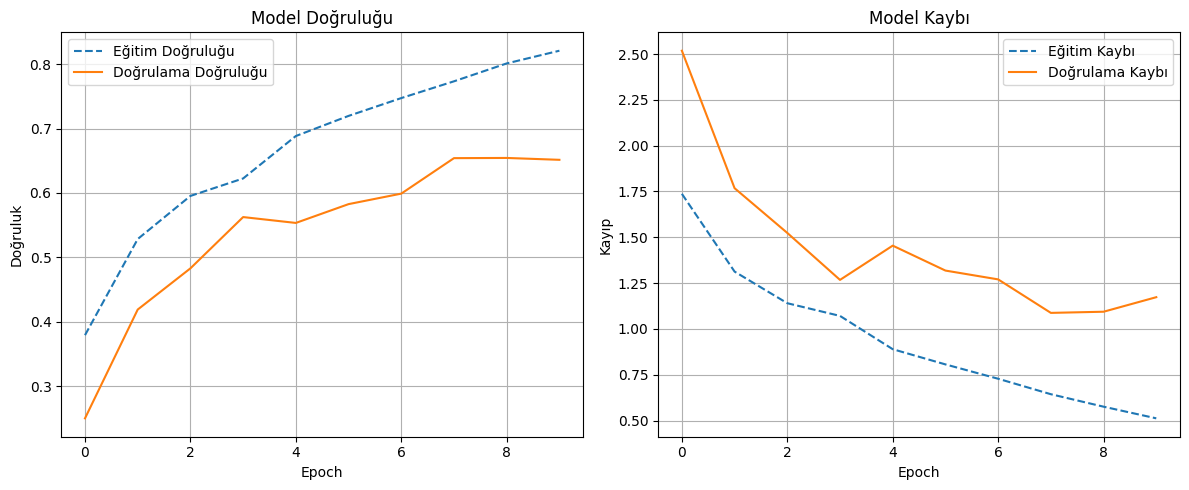

In [ ]:


# Doğruluk (Accuracy) grafiği
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history2.history['accuracy'], label='Eğitim Doğruluğu', linestyle='--')
plt.plot(history2.history['val_accuracy'], label='Doğrulama Doğruluğu', linestyle='-')
plt.title('Model Doğruluğu')
plt.xlabel('Epoch')
plt.ylabel('Doğruluk')
plt.legend()
plt.grid(True)

# Kayıp (Loss) grafiği
plt.subplot(1, 2, 2)
plt.plot(history2.history['loss'], label='Eğitim Kaybı', linestyle='--')
plt.plot(history2.history['val_loss'], label='Doğrulama Kaybı', linestyle='-')
plt.title('Model Kaybı')
plt.xlabel('Epoch')
plt.ylabel('Kayıp')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


In [ ]:
table_resnet50 = [
    ["Model", "Eğitim Accuracy", "Test Accuracy", "Eğitim Loss", "Test Loss"],
    ["ResNET-50",
     f"{history2.history['accuracy'][-1]:.4f}",
     f"{history2.history['val_accuracy'][-1]:.4f}",
     f"{history2.history['loss'][-1]:.4f}",
     f"{history2.history['val_loss'][-1]:.4f}"]
]

# Tabloyu string formatında değişkene ata
resnet50_table_str = tabulate(table_resnet50, headers="firstrow", tablefmt="grid")


In [ ]:
print(resnet50_table_str)

+-----------+-------------------+-----------------+---------------+-------------+
| Model     |   Eğitim Accuracy |   Test Accuracy |   Eğitim Loss |   Test Loss |
+===========+===================+=================+===============+=============+
| ResNET-50 |            0.8209 |          0.6515 |        0.5119 |      1.1731 |
+-----------+-------------------+-----------------+---------------+-------------+


## Mini Nin Örneği

In [ ]:

# Veri setini yükle
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Model seçimi
model3 = build_mini_nin()  # Diğer modellerden birini seçebilirsiniz
model3.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Eğitim
history3 = model3.fit(x_train, y_train,
                    batch_size=128,
                    epochs=15,
                    validation_data=(x_test, y_test))


Epoch 1/15
391/391 ━━━━━━━━━━━━━━━━━━━━ 36s 70ms/step - accuracy: 0.1178 - loss: 2.2908 - val_accuracy: 0.1803 - val_loss: 2.2329
Epoch 2/15
391/391 ━━━━━━━━━━━━━━━━━━━━ 19s 50ms/step - accuracy: 0.2259 - loss: 2.1133 - val_accuracy: 0.3974 - val_loss: 1.6160
Epoch 3/15
391/391 ━━━━━━━━━━━━━━━━━━━━ 20s 51ms/step - accuracy: 0.4362 - loss: 1.5312 - val_accuracy: 0.5024 - val_loss: 1.3714
Epoch 4/15
391/391 ━━━━━━━━━━━━━━━━━━━━ 21s 51ms/step - accuracy: 0.5226 - loss: 1.3168 - val_accuracy: 0.5799 - val_loss: 1.1856
Epoch 5/15
391/391 ━━━━━━━━━━━━━━━━━━━━ 20s 51ms/step - accuracy: 0.5826 - loss: 1.1671 - val_accuracy: 0.6111 - val_loss: 1.0944
Epoch 6/15
391/391 ━━━━━━━━━━━━━━━━━━━━ 20s 51ms/step - accuracy: 0.6173 - loss: 1.0714 - val_accuracy: 0.6292 - val_loss: 1.0596
Epoch 7/15
391/391 ━━━━━━━━━━━━━━━━━━━━ 20s 51ms/step - accuracy: 0.6488 - loss: 1.0007 - val_accuracy: 0.6685 - val_loss: 0.9541
Epoch 8/15
391/391 ━━━━━━━━━━━━━━━━━━━━ 21s 51ms/step - accuracy: 0.6738 - loss: 0.9260 - 

In [ ]:
# Değerlendirme
test_loss, test_acc = model3.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_acc*100:.2f}%")

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.7522 - loss: 0.7164
Test Accuracy: 74.98%


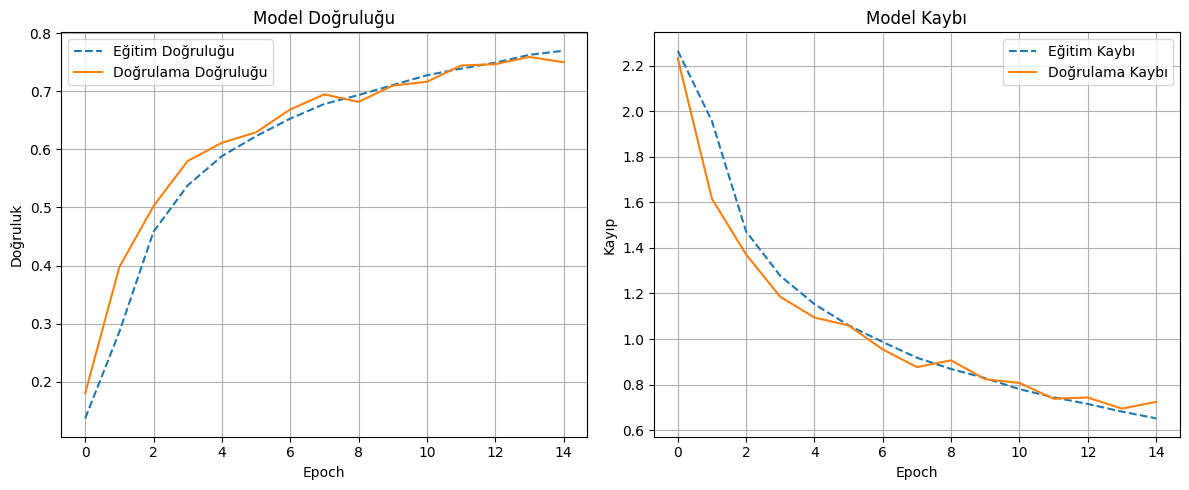

In [ ]:
# Doğruluk (Accuracy) grafiği
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history3.history['accuracy'], label='Eğitim Doğruluğu', linestyle='--')
plt.plot(history3.history['val_accuracy'], label='Doğrulama Doğruluğu', linestyle='-')
plt.title('Model Doğruluğu')
plt.xlabel('Epoch')
plt.ylabel('Doğruluk')
plt.legend()
plt.grid(True)

# Kayıp (Loss) grafiği
plt.subplot(1, 2, 2)
plt.plot(history3.history['loss'], label='Eğitim Kaybı', linestyle='--')
plt.plot(history3.history['val_loss'], label='Doğrulama Kaybı', linestyle='-')
plt.title('Model Kaybı')
plt.xlabel('Epoch')
plt.ylabel('Kayıp')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


In [ ]:
table_nin = [
    ["Model", "Eğitim Accuracy", "Test Accuracy", "Eğitim Loss", "Test Loss"],
    ["NiN",
     f"{history3.history['accuracy'][-1]:.4f}",
     f"{history3.history['val_accuracy'][-1]:.4f}",
     f"{history3.history['loss'][-1]:.4f}",
     f"{history3.history['val_loss'][-1]:.4f}"]
]

# Tabloyu string formatında değişkene ata
nin_table_str = tabulate(table_nin, headers="firstrow", tablefmt="grid")


In [ ]:
print(nin_table_str)

+---------+-------------------+-----------------+---------------+-------------+
| Model   |   Eğitim Accuracy |   Test Accuracy |   Eğitim Loss |   Test Loss |
+=========+===================+=================+===============+=============+
| NiN     |            0.7696 |          0.7498 |        0.6515 |      0.7236 |
+---------+-------------------+-----------------+---------------+-------------+


## Grafikler Değerlendirilmesi

### NiN
Eğitim ve test başarımları birbirine çok yakın → overfitting yok gibi görünüyor.

Başarı orta düzeyde ama stabil bir model.

Loss değerleri yüksek ama paralel gittiği için model genel olarak dengeli çalışmış.



###ResNET-50
 Eğitim çok başarılı ama test çok düşük → açık bir overfitting durumu var.

Test loss değeri çok yüksek (neredeyse 2 katı), model eğitimi ezberlemiş olabilir.

Bu modelde düzenleme (regularization), veri artırma veya dropout gibi teknikler denenebilir.



### VGG-16


Eğitim ve test arasında makul bir fark var → hafif overfitting olabilir ama kabul edilebilir.

Başarı en yüksek modellerden biri.

Test doğruluğu en yüksek model bu.

Dengeli ve güçlü bir model olmuş, ResNet’ten daha stabil performans vermiş.



### Basit CNN


Eğitim ve test arasında makul bir fark var → hafif overfitting olabilir ama kabul edilebilir.

Başarı en yüksek modellerden biri.

Test doğruluğu en yüksek model bu.

Dengeli ve güçlü bir model olmuş, ResNet’ten daha stabil performans vermiş.

